In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("CollegePlacementAnalysis").getOrCreate()

df = spark.read.option("header", True).option("inferSchema", True).csv(r"file:///C:/Users/Navya/Downloads/CollegePlacement.csv")
df.show(5)
df.printSchema()
print("Total Rows:", df.count())
print("Total Columns:", len(df.columns))

+----------+---+---------------+----+--------------------+---------------------+----------------------+--------------------+------------------+---------+
|College_ID| IQ|Prev_Sem_Result|CGPA|Academic_Performance|Internship_Experience|Extra_Curricular_Score|Communication_Skills|Projects_Completed|Placement|
+----------+---+---------------+----+--------------------+---------------------+----------------------+--------------------+------------------+---------+
|   CLG0030|107|           6.61|6.28|                   8|                   No|                     8|                   8|                 4|       No|
|   CLG0061| 97|           5.52|5.37|                   8|                   No|                     7|                   8|                 0|       No|
|   CLG0036|109|           5.36|5.83|                   9|                   No|                     3|                   1|                 1|       No|
|   CLG0055|122|           5.47|5.75|                   6|                  

In [15]:
#Null Value & Missing Data Analysis
from pyspark.sql.functions import sum as spark_sum
df.select([spark_sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns]).show()

+----------+---+---------------+----+--------------------+---------------------+----------------------+--------------------+------------------+---------+------+
|College_ID| IQ|Prev_Sem_Result|CGPA|Academic_Performance|Internship_Experience|Extra_Curricular_Score|Communication_Skills|Projects_Completed|Placement|Placed|
+----------+---+---------------+----+--------------------+---------------------+----------------------+--------------------+------------------+---------+------+
|         0|  0|              0|   0|                   0|                    0|                     0|                   0|                 0|        0|     0|
+----------+---+---------------+----+--------------------+---------------------+----------------------+--------------------+------------------+---------+------+



In [8]:
#Summary Statistics
df.describe().show()

+-------+----------+------------------+------------------+------------------+--------------------+---------------------+----------------------+--------------------+------------------+---------+
|summary|College_ID|                IQ|   Prev_Sem_Result|              CGPA|Academic_Performance|Internship_Experience|Extra_Curricular_Score|Communication_Skills|Projects_Completed|Placement|
+-------+----------+------------------+------------------+------------------+--------------------+---------------------+----------------------+--------------------+------------------+---------+
|  count|     10000|             10000|             10000|             10000|               10000|                10000|                 10000|               10000|             10000|    10000|
|   mean|      NULL|           99.4718|7.5356730000000445|          7.532379|              5.5464|                 NULL|                4.9709|              5.5618|            2.5134|     NULL|
| stddev|      NULL|15.0531014

In [9]:
#Placement Rate Calculation
from pyspark.sql.functions import avg, round, when, col

# Convert 'Placement' column (Yes/No or Placed/Not Placed) into numeric 1/0
df = df.withColumn("Placed", when(col("Placement") == "Placed", 1)
                              .when(col("Placement") == "Yes", 1)
                              .otherwise(0))

# Calculate overall placement rate (%)
placement_rate = df.agg(round(avg("Placed") * 100, 2).alias("Placement_Rate"))
placement_rate.show()


+--------------+
|Placement_Rate|
+--------------+
|         16.59|
+--------------+



In [10]:
#Average CGPA of Placed vs Not Placed
from pyspark.sql.functions import round, mean
df.groupBy("Placement").agg(round(mean("CGPA"), 2).alias("Average_CGPA")).show()

+---------+------------+
|Placement|Average_CGPA|
+---------+------------+
|       No|        7.32|
|      Yes|        8.59|
+---------+------------+



In [11]:
#Average IQ of Placed vs Not Placed
df.groupBy("Placement").agg(round(mean("IQ"), 2).alias("Average_IQ")).show()

+---------+----------+
|Placement|Average_IQ|
+---------+----------+
|       No|     97.55|
|      Yes|    109.12|
+---------+----------+



In [23]:
#Correlation between Academic Performance and Placement
from pyspark.sql.functions import corr
df.select(corr("Academic_Performance", "CGPA").alias("Perf_CGPA_Corr")).show()

+--------------------+
|      Perf_CGPA_Corr|
+--------------------+
|-0.00295759985157...|
+--------------------+



In [24]:
#CGPA vs Projects Completed
df.groupBy("Projects_Completed").agg(round(mean("CGPA"), 2).alias("Avg_CGPA")).orderBy("Projects_Completed").show()

+------------------+--------+
|Projects_Completed|Avg_CGPA|
+------------------+--------+
|                 0|    7.49|
|                 1|    7.49|
|                 2|    7.49|
|                 3|     7.6|
|                 4|    7.56|
|                 5|    7.56|
+------------------+--------+



In [25]:
#Communication Skills vs Placement
df.groupBy("Placement").agg(round(mean("Communication_Skills"), 2).alias("Avg_Comm_Score")).show()

+---------+--------------+
|Placement|Avg_Comm_Score|
+---------+--------------+
|       No|          5.14|
|      Yes|          7.66|
+---------+--------------+



In [26]:
#Extra Curricular vs Placement
df.groupBy("Placement").agg(round(mean("Extra_Curricular_Score"), 2).alias("Avg_ExtraCurricular")).show()

+---------+-------------------+
|Placement|Avg_ExtraCurricular|
+---------+-------------------+
|       No|               4.98|
|      Yes|               4.94|
+---------+-------------------+



In [35]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("CollegePlacementPlots").getOrCreate()

# change path if needed
df = spark.read.option("header", True).option("inferSchema", True).csv(r"file:///C:/Users/Navya/Downloads/CollegePlacement.csv")

df.show(5)
df.printSchema()

+----------+---+---------------+----+--------------------+---------------------+----------------------+--------------------+------------------+---------+
|College_ID| IQ|Prev_Sem_Result|CGPA|Academic_Performance|Internship_Experience|Extra_Curricular_Score|Communication_Skills|Projects_Completed|Placement|
+----------+---+---------------+----+--------------------+---------------------+----------------------+--------------------+------------------+---------+
|   CLG0030|107|           6.61|6.28|                   8|                   No|                     8|                   8|                 4|       No|
|   CLG0061| 97|           5.52|5.37|                   8|                   No|                     7|                   8|                 0|       No|
|   CLG0036|109|           5.36|5.83|                   9|                   No|                     3|                   1|                 1|       No|
|   CLG0055|122|           5.47|5.75|                   6|                  

In [36]:
!pip install matplotlib seaborn pandas

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyspark-client 4.0.1 requires googleapis-common-protos>=1.65.0, which is not installed.
pyspark-client 4.0.1 requires grpcio-status>=1.67.0, which is not installed.
pyspark-client 4.0.1 requires pyarrow>=11.0.0, which is not installed.
pyspark-connect 4.0.1 requires googleapis-common-protos>=1.65.0, which is not installed.
pyspark-connect 4.0.1 requires grpcio-status>=1.67.0, which is not installed.
pyspark-connect 4.0.1 requires pyarrow>=11.0.0, which is not installed.


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 6.3 MB/s eta 0:00:02
   ------------ --------------------------- 2.6/8.1 MB 6.9 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 7.9 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 8.2 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 7.4 MB/s  0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.3 MB 9.4 MB/s eta 0:00:02
   ------------

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [39]:
pandas_df = df.toPandas()

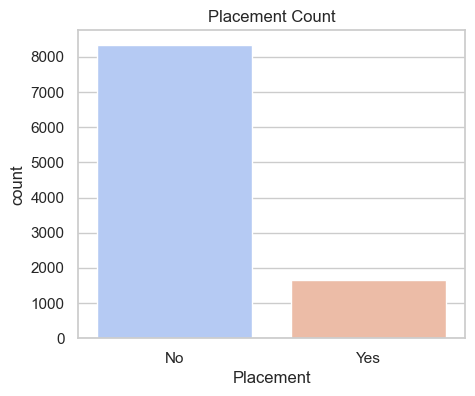

In [46]:
plt.figure(figsize=(5,4))
sns.countplot(data=pandas_df, x="Placement", hue="Placement", palette="coolwarm", legend=False)
plt.title("Placement Count")
plt.show()

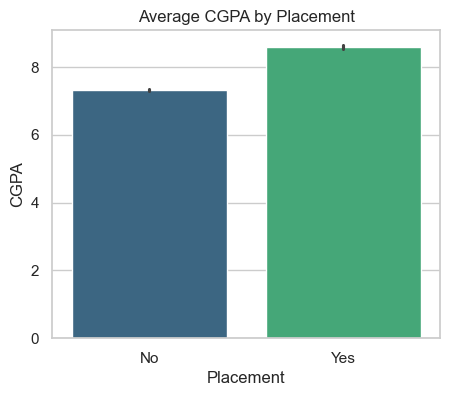

In [45]:
plt.figure(figsize=(5,4))
sns.barplot(data=pandas_df, x="Placement", y="CGPA", hue="Placement", palette="viridis", legend=False)
plt.title("Average CGPA by Placement")
plt.show()

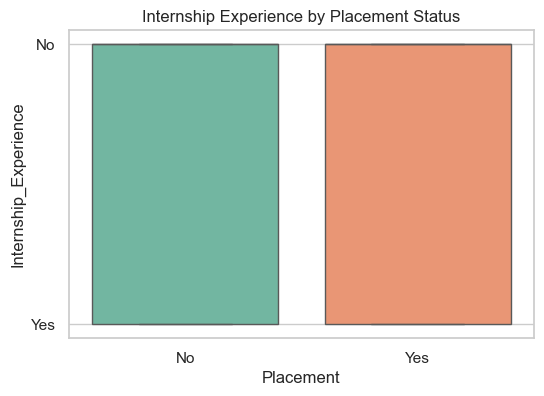

In [44]:
plt.figure(figsize=(6,4))
sns.boxplot(data=pandas_df, x="Placement", y="Internship_Experience", hue="Placement", palette="Set2", legend=False)
plt.title("Internship Experience by Placement Status")
plt.show()